In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'C:\\Users\\Samiksha\\Downloads'

In [4]:
import os

# Path to your dataset
dataset_path = r"C:\Users\Samiksha\Desktop\TrashType_Image_Dataset"

# Check if the directory exists
if os.path.exists(dataset_path):
    print("Directory exists.")
    # List the contents of the dataset path
    print("Contents:", os.listdir(dataset_path))
else:
    print("Directory does not exist.")


Directory exists.
Contents: ['train', 'validation']


In [5]:
PATH=(r"C:\Users\Samiksha\Desktop\TrashType_Image_Dataset")

In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
# Update directories for waste classification categories
train_cardboard_dir = os.path.join(train_dir, 'cardboard')
train_glass_dir = os.path.join(train_dir, 'glass')
train_metal_dir = os.path.join(train_dir, 'metal')
train_paper_dir = os.path.join(train_dir, 'paper')
train_plastic_dir = os.path.join(train_dir, 'plastic')
train_trash_dir = os.path.join(train_dir, 'trash')

validation_cardboard_dir = os.path.join(validation_dir, 'cardboard')
validation_glass_dir = os.path.join(validation_dir, 'glass')
validation_metal_dir = os.path.join(validation_dir, 'metal')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_plastic_dir = os.path.join(validation_dir, 'plastic')
validation_trash_dir = os.path.join(validation_dir, 'trash')

In [8]:
# Get the number of images in each directory
num_cardboard_tr = len(os.listdir(train_cardboard_dir))
num_glass_tr = len(os.listdir(train_glass_dir))
num_metal_tr = len(os.listdir(train_metal_dir))
num_paper_tr = len(os.listdir(train_paper_dir))
num_plastic_tr = len(os.listdir(train_plastic_dir))
num_trash_tr = len(os.listdir(train_trash_dir))

num_cardboard_val = len(os.listdir(validation_cardboard_dir))
num_glass_val = len(os.listdir(validation_glass_dir))
num_metal_val = len(os.listdir(validation_metal_dir))
num_paper_val = len(os.listdir(validation_paper_dir))
num_plastic_val = len(os.listdir(validation_plastic_dir))
num_trash_val = len(os.listdir(validation_trash_dir))

total_train = num_cardboard_tr + num_glass_tr + num_metal_tr + num_paper_tr + num_plastic_tr + num_trash_tr
total_val = num_cardboard_val + num_glass_val + num_metal_val + num_paper_val + num_plastic_val + num_trash_val

print('Total training images:', total_train)
print('Total validation images:', total_val)


Total training images: 1264
Total validation images: 1263


In [9]:
# Parameters
batch_size = 32
IMG_SHAPE = 150  # All images will be resized to 150x150

In [10]:
# Data Augmentation
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45, zoom_range=0.5, width_shift_range=.15,
                                           height_shift_range=.15, horizontal_flip=True, fill_mode='nearest')

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
# Load the data from directories
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode='categorical')

Found 1264 images belonging to 6 classes.
Found 1263 images belonging to 6 classes.


C:\Users\Samiksha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Samiksha\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.1932 - loss: 2.1940 - val_accuracy: 0.2572 - val_loss: 1.6584
Epoch 2/20
 1/39 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.1875 - loss: 1.6156

C:\Users\Samiksha\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.1875 - loss: 1.6156 - val_accuracy: 0.2780 - val_loss: 1.6464
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 453ms/step - accuracy: 0.3165 - loss: 1.6475 - val_accuracy: 0.3870 - val_loss: 1.4235
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.3125 - loss: 1.4947 - val_accuracy: 0.3670 - val_loss: 1.4556
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 450ms/step - accuracy: 0.3979 - loss: 1.5018 - val_accuracy: 0.4503 - val_loss: 1.3266
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.4062 - loss: 1.3709 - val_accuracy: 0.4391 - val_loss: 1.3664
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 456ms/step - accuracy: 0.4403 - loss: 1.3731 - val_accuracy: 0.5128 - val_loss: 1.3264
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5938 - loss: 1.0266 - val_accuracy: 0.5272 - val_loss: 1.2912
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 481ms/step - accuracy: 0.4801 - loss: 1.2755 - val_accuracy: 0.5112 - val_

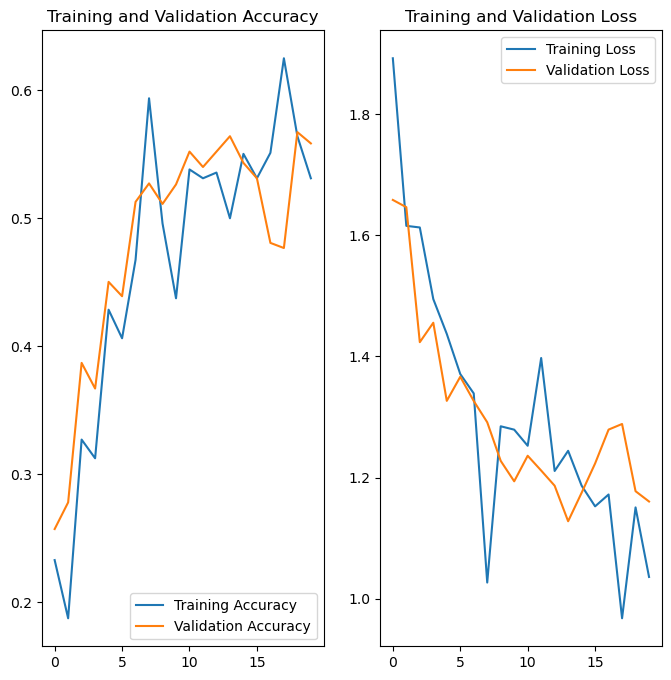

In [12]:
# Build a simple CNN model for classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # 6 categories: Cardboard, Glass, Metal, Paper, Plastic, Trash
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

# Visualize the training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,110,228 (217.86 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,073,486 (145.24 MB)

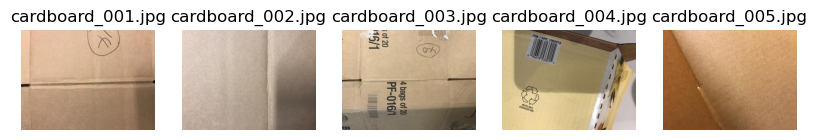

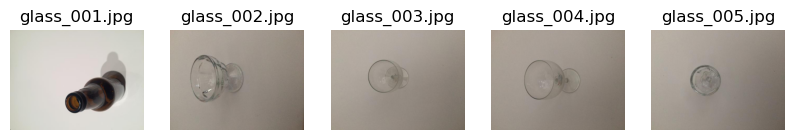

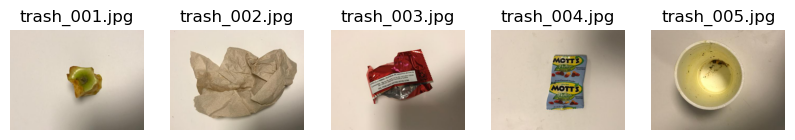

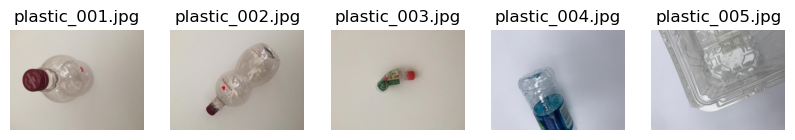

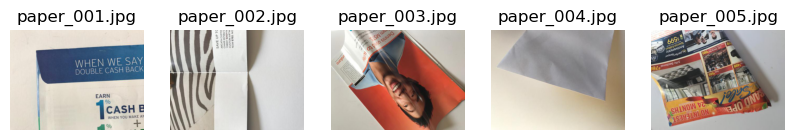

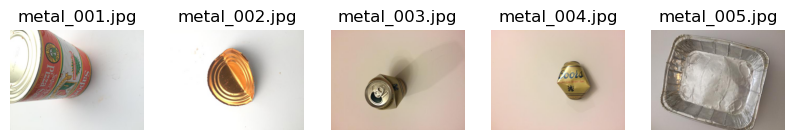

In [14]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Set the paths for your dataset (update with your actual path)
train_cardboard_dir = os.path.join(train_dir, 'cardboard')  # Assuming this exists
train_glass_dir = os.path.join(train_dir, 'glass')

# Function to display images
def plot_images_from_directory(directory, num_images=5):
    images = os.listdir(directory)[:num_images]  # Select first few images from the directory
    plt.figure(figsize=(10, 10))
    
    for i, image_name in enumerate(images):
        image_path = os.path.join(directory, image_name)
        img = mpimg.imread(image_path)  # Read the image
        
        plt.subplot(1, num_images, i+1)  # Create subplots
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_name)  # Title with image name
    
    plt.show()


plot_images_from_directory(train_cardboard_dir, num_images=5)
plot_images_from_directory(train_glass_dir, num_images=5)
plot_images_from_directory(train_trash_dir, num_images=5)
plot_images_from_directory(train_plastic_dir, num_images=5)
plot_images_from_directory(train_paper_dir, num_images=5)
plot_images_from_directory(train_metal_dir, num_images=5)
